# 4번

In [17]:
import numpy as np
import pandas as pd
df = pd.read_csv("딥러닝알고리즘4.csv", encoding = 'utf-8')
df

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


In [34]:
X = df.drop(['ID', 'Outcome'], axis = 1)
y = df['Outcome']

In [35]:
np.unique(y)

array([0, 1])

In [36]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#y = to_categorical(y)
x_data, test_x, y_data, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42, stratify = y_data)

In [37]:
print(train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape)

(364, 8) (196, 8) (92, 8) (364,) (196,) (92,)


In [38]:
s = StandardScaler()
s.fit(train_x)
s_train_x = s.transform(train_x)
s_test_x = s.transform(test_x)
s_val_x = s.transform(val_x)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
m = Sequential()
m.add(Dense(64, activation = 'relu', input_shape = s_train_x.shape[1:]))
m.add(Dense(32, activation = 'relu'))
m.add(Dense(1, activation = 'sigmoid'))
m.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'acc')
m.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
hy = m.fit(s_train_x, train_y, validation_data = (s_val_x, val_y), batch_size = 32, epochs = 10)

Epoch 1/10
12/12 [==============================] - 0s 10ms/step - loss: 0.4241 - acc: 0.8049 - val_loss: 0.5487 - val_acc: 0.7283
Epoch 2/10
12/12 [==============================] - 0s 7ms/step - loss: 0.4200 - acc: 0.8104 - val_loss: 0.5476 - val_acc: 0.7283
Epoch 3/10
12/12 [==============================] - 0s 10ms/step - loss: 0.4170 - acc: 0.7995 - val_loss: 0.5465 - val_acc: 0.7174
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 0.4135 - acc: 0.8077 - val_loss: 0.5538 - val_acc: 0.7391
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 0.4096 - acc: 0.8132 - val_loss: 0.5528 - val_acc: 0.7283
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.4060 - acc: 0.8159 - val_loss: 0.5581 - val_acc: 0.7283
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.4030 - acc: 0.8159 - val_loss: 0.5571 - val_acc: 0.7283
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.3992 - acc: 0.

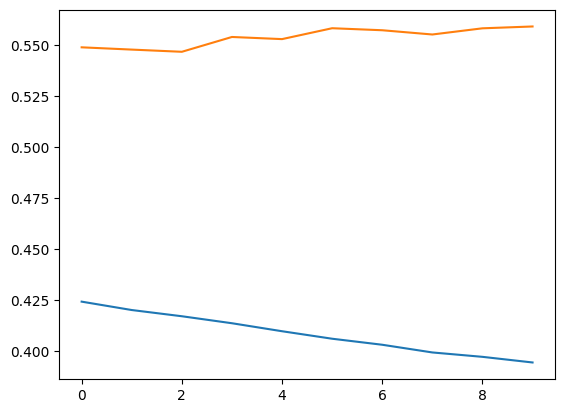

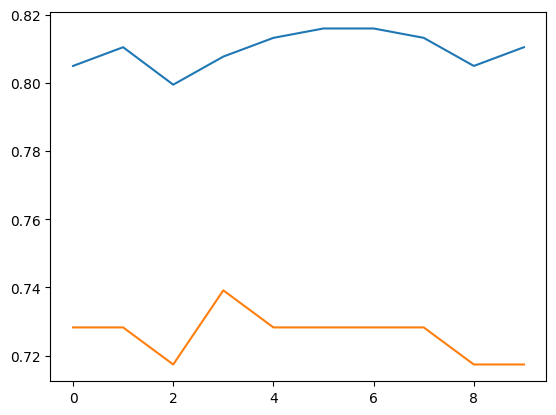

In [44]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])

In [41]:
m.evaluate(s_test_x, test_y)

7/7 [==============================] - 0s 3ms/step - loss: 0.4952 - acc: 0.7653


[0.49515053629875183, 0.7653061151504517]

#5번

In [45]:
import numpy as np
import pandas as pd
df = pd.read_csv("딥러닝알고리즘5.csv", encoding = 'utf-8')
df

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [47]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1328 non-null   int64  
 1   hour                    1328 non-null   int64  
 2   hour_bef_temperature    1328 non-null   float64
 3   hour_bef_precipitation  1328 non-null   float64
 4   hour_bef_windspeed      1328 non-null   float64
 5   hour_bef_humidity       1328 non-null   float64
 6   hour_bef_visibility     1328 non-null   float64
 7   hour_bef_ozone          1328 non-null   float64
 8   hour_bef_pm10           1328 non-null   float64
 9   hour_bef_pm2.5          1328 non-null   float64
 10  count                   1328 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 124.5 KB


In [48]:
X = df.drop(['id', 'count'], axis = 1)
y = df['count']

In [50]:
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_data, test_x, y_data, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [51]:
print(train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape)

(743, 9) (399, 9) (186, 9) (743,) (399,) (186,)


In [52]:
s = MinMaxScaler()
s.fit(train_x)
s_train_x = s.transform(train_x)
s_test_x = s.transform(test_x)
s_val_x = s.transform(val_x)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
m = Sequential()
m.add(Dense(64, activation = 'relu', input_shape = s_train_x.shape[1:]))
m.add(Dense(32, activation = 'relu'))
m.add(Dense(1))
m.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')
m.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
hy = m.fit(s_train_x, train_y, validation_data = (s_val_x, val_y), batch_size = 32, epochs = 10)

Epoch 1/10
24/24 [==============================] - 1s 12ms/step - loss: 18254.9746 - mae: 108.1678 - val_loss: 18057.7441 - val_mae: 108.4150
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 17987.7402 - mae: 107.0211 - val_loss: 17624.5449 - val_mae: 106.6089
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 17356.8848 - mae: 104.2738 - val_loss: 16695.7480 - val_mae: 102.6986
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 16116.9277 - mae: 98.9025 - val_loss: 15062.9854 - val_mae: 95.7603
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 14127.3955 - mae: 90.4637 - val_loss: 12645.1670 - val_mae: 85.7798
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 11438.1396 - mae: 79.9477 - val_loss: 9706.1973 - val_mae: 73.8501
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 8591.3496 - mae: 68.9589 - val_loss: 6951.2485 - val_mae: 61.8516
Epoch 8/10
24/24

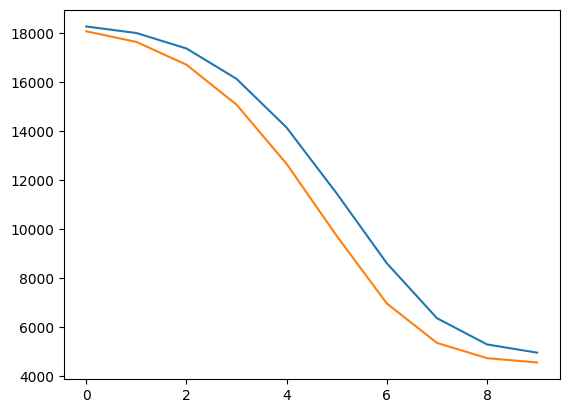

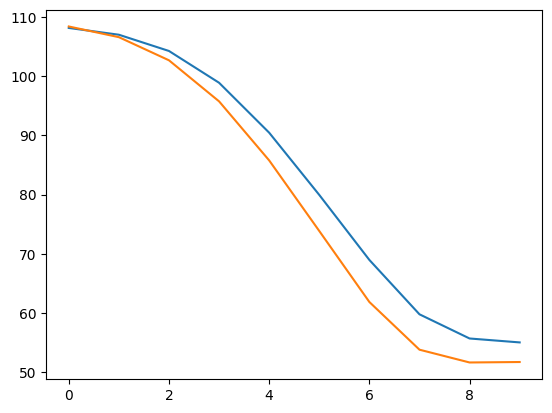

In [55]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['mae'])
plt.plot(hy.history['val_mae'])

In [56]:
m.evaluate(s_test_x, test_y)

13/13 [==============================] - 0s 2ms/step - loss: 5609.8203 - mae: 57.8905


[5609.8203125, 57.8904914855957]

#9번

In [71]:
from keras.datasets import cifar10
(_,_),(X,y)=cifar10.load_data()

In [72]:
from sklearn.model_selection import train_test_split

x_data, test_x, y_data, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42, stratify = y_data)

In [73]:
print(train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape)

(5600, 32, 32, 3) (3000, 32, 32, 3) (1400, 32, 32, 3) (5600, 1) (3000, 1) (1400, 1)


In [74]:
from keras.utils import to_categorical
s_train_y = to_categorical(train_y)
s_test_y = to_categorical(test_y)
s_val_y = to_categorical(val_y)

s_train_x = train_x / 255
s_test_x = test_x / 255
s_val_x = val_x / 255

In [75]:
print(s_train_x.shape, s_test_x.shape, s_val_x.shape, s_train_y.shape, s_test_y.shape, s_val_y.shape)

(5600, 32, 32, 3) (3000, 32, 32, 3) (1400, 32, 32, 3) (5600, 10) (3000, 10) (1400, 10)


In [77]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
ck_m = ModelCheckpoint('best_c.h5', monitor = 'val_acc', save_best_only = True)
es = EarlyStopping(patience = 10, restore_best_weights = True)

In [78]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

m = Sequential()
m.add(Conv2D(32, 3, padding = 'same', input_shape = s_train_x.shape[1:]))
m.add(Conv2D(32, 3, padding = 'same'))
m.add(MaxPooling2D(2))
m.add(BatchNormalization())
m.add(Dropout(0.25))
m.add(Conv2D(64, 3, padding = 'same'))
m.add(Conv2D(64, 3, padding = 'same'))
m.add(MaxPooling2D(2))
m.add(BatchNormalization())
m.add(Dropout(0.5))
m.add(Flatten())
m.add(Dense(64, activation = 'relu'))
m.add(Dense(32, activation = 'relu'))
m.add(Dense(10, activation = 'softmax'))
m.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'acc')
hy = m.fit(s_train_x, s_train_y, validation_data = (s_val_x, s_val_y), batch_size = 128, epochs = 10, callbacks = [es, ck_m])

Epoch 1/10
44/44 [==============================] - 21s 421ms/step - loss: 2.1036 - acc: 0.2636 - val_loss: 2.1261 - val_acc: 0.2286
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - 18s 416ms/step - loss: 1.7404 - acc: 0.3811 - val_loss: 2.7815 - val_acc: 0.1800
Epoch 3/10
44/44 [==============================] - 18s 405ms/step - loss: 1.5907 - acc: 0.4341 - val_loss: 5.0189 - val_acc: 0.1193
Epoch 4/10
44/44 [==============================] - 21s 471ms/step - loss: 1.4365 - acc: 0.4771 - val_loss: 5.7555 - val_acc: 0.1050
Epoch 5/10
44/44 [==============================] - 22s 499ms/step - loss: 1.3381 - acc: 0.5202 - val_loss: 5.3535 - val_acc: 0.1121
Epoch 6/10
44/44 [==============================] - 19s 431ms/step - loss: 1.2321 - acc: 0.5566 - val_loss: 4.7472 - val_acc: 0.1429
Epoch 7/10
44/44 [==============================] - 19s 433ms/step - loss: 1.1052 - acc: 0.6048 - val_loss: 5.3077 - val_acc: 0.1257
Epoch 8/10
44/44 [==============================] - 22s 491ms/step - loss: 1.0253 - acc: 0.6341 - val_loss: 3.2941 - val_acc: 0.2079
Epoch 9/10
44/44 [==============================] - 18s 406ms/step - loss: 0.942

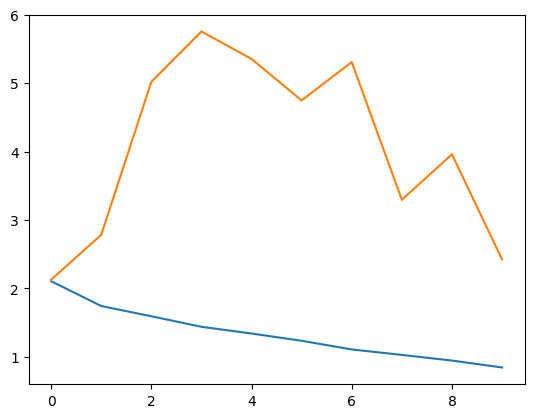

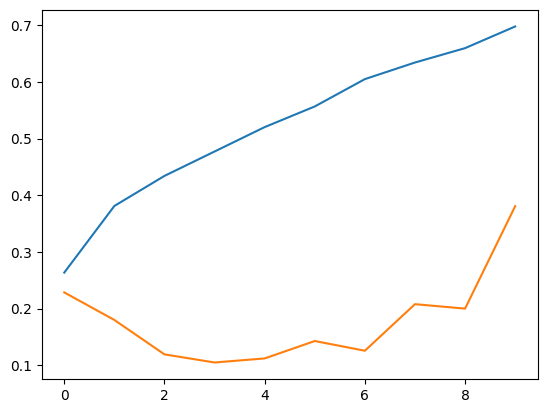

In [79]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])

In [80]:
m.evaluate(s_test_x, s_test_y)

94/94 [==============================] - 2s 26ms/step - loss: 2.4341 - acc: 0.3530


[2.434074640274048, 0.3529999852180481]

#15번

In [81]:
from keras.datasets import cifar10
(_,_),(X,y)=cifar10.load_data()

#데이터 분할
from sklearn.model_selection import train_test_split

x_data, test_x, y_data, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42, stratify = y_data)
print(train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape)

#데이터 전처리
from keras.utils import to_categorical
s_train_y = to_categorical(train_y)
s_test_y = to_categorical(test_y)
s_val_y = to_categorical(val_y)

(5600, 32, 32, 3) (3000, 32, 32, 3) (1400, 32, 32, 3) (5600, 1) (3000, 1) (1400, 1)


In [83]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
ck_m = ModelCheckpoint('best_c.h5', monitor = 'val_acc', save_best_only = True)
es = EarlyStopping(patience = 10, restore_best_weights = True)

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Rescaling, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, RandomFlip, RandomZoom, RandomRotation, Input
from keras.applications import VGG16, VGG19, MobileNet, Xception, ResNet50, InceptionV3
add_m = Sequential()
add_m.add(Input(shape = (32,32,3)))
add_m.add(Rescaling(1./255))
add_m.add(RandomFlip('horizontal'))
add_m.add(RandomRotation(0.1))
add_m.add(RandomZoom(0.2))
add_m.add(VGG16(include_top = False))
add_m.add(Flatten(input_shape = (1, 1, 512)))
add_m.add(Dense(10, activation = 'softmax'))
add_m.layers[4].trainable = False
add_m.summary()
add_m.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'acc')
hy = add_m.fit(train_x, s_train_y, validation_data = (val_x, s_val_y), batch_size = 128, epochs = 10, callbacks = [es, ck_m])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_4 (RandomR  (None, 32, 32, 3)         0         
 otation)                                                        
                                                                 
 random_zoom_4 (RandomZoom)  (None, 32, 32, 3)         0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_10 (Flatten)        (None, 512)               0         
                                                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - 70s 2s/step - loss: 2.0092 - acc: 0.2988 - val_loss: 1.9198 - val_acc: 0.3393
Epoch 3/10
44/44 [==============================] - 70s 2s/step - loss: 1.8818 - acc: 0.3580 - val_loss: 1.8186 - val_acc: 0.3829
Epoch 4/10
44/44 [==============================] - 63s 1s/step - loss: 1.8146 - acc: 0.3757 - val_loss: 1.7536 - val_acc: 0.4050
Epoch 5/10
31/44 [====================>.........] - ETA: 12s - loss: 1.7676 - acc: 0.3891

KeyboardInterrupt: ignored

In [88]:
# ResNet50

add_m1 = Sequential()
add_m1.add(Input(shape = (32,32,3)))
add_m1.add(Rescaling(1./255))
add_m1.add(RandomFlip('horizontal'))
add_m1.add(RandomRotation(0.1))
add_m1.add(RandomZoom(0.2))
add_m1.add(ResNet50(include_top = False))
add_m1.add(Flatten(input_shape = (1, 1, 512)))
add_m1.add(Dense(10, activation = 'softmax'))
add_m1.layers[4].trainable = False
add_m1.summary()
add_m1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'acc')
hy1 = add_m1.fit(train_x, s_train_y, validation_data = (val_x, s_val_y), batch_size = 128, epochs = 10, callbacks = [es, ck_m])

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_5 (RandomR  (None, 32, 32, 3)         0         
 otation)                                                        
                                                                 
 random_zoom_5 (RandomZoom)  (None, 32, 32, 3)         0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                      

KeyboardInterrupt: ignored

In [90]:
# MobileNet

add_m2 = Sequential()
add_m2.add(Input(shape = (32,32,3)))
add_m2.add(Rescaling(1./255))
add_m2.add(RandomFlip('horizontal'))
add_m2.add(RandomRotation(0.1))
add_m2.add(RandomZoom(0.2))
add_m2.add(MobileNet(include_top = False))
add_m2.add(Flatten(input_shape = (1, 1, 512)))
add_m2.add(Dense(10, activation = 'softmax'))
add_m2.layers[4].trainable = False
add_m2.summary()
add_m2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'acc')
hy2 = add_m2.fit(train_x, s_train_y, validation_data = (val_x, s_val_y), batch_size = 128, epochs = 10, callbacks = [es, ck_m])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 random_flip_7 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_7 (RandomR  (None, 32, 32, 3)         0         
 otation)                                                        
                                                                 
 random_zoom_7 (RandomZoom)  (None, 32, 32, 3)         0         
                                                                 
 mobilenet_1.00_224 (Functi  (None, None, None, 1024   3228864   
 onal)                       )                                   
                                                                 
 flatten_13 (Flatten)        (None, 1024)            

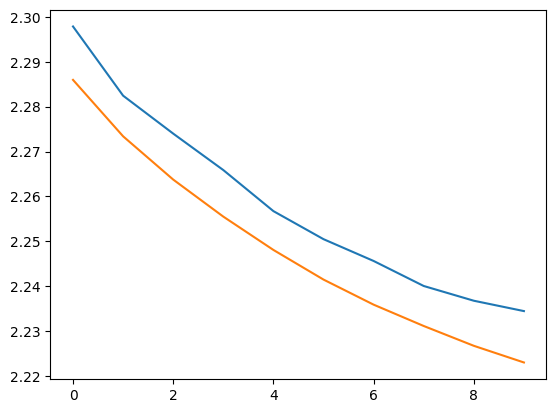

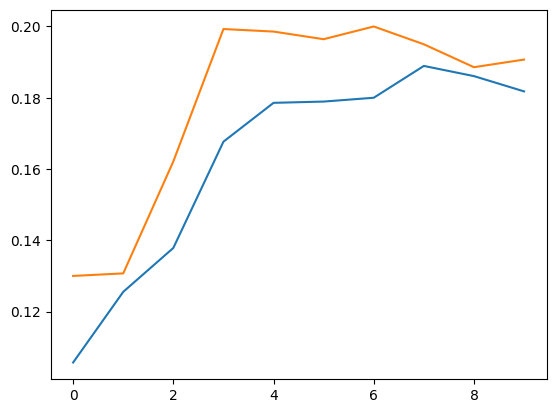

In [91]:
import matplotlib.pyplot as plt
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])
plt.show()
plt.plot(hy2.history['acc'])
plt.plot(hy2.history['val_acc'])

In [92]:
add_m2.evaluate(test_x, s_test_y)

94/94 [==============================] - 2s 19ms/step - loss: 2.2242 - acc: 0.1867


[2.2242136001586914, 0.18666666746139526]

#10번

In [93]:
import pandas as pd
df=pd.read_csv("CNN_RNN_GAN5.csv")
df

,y,X
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [1]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 24.2 MB/s eta 0:00:00


In [2]:
from konlpy.tag import Okt

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd
df=pd.read_csv("CNN_RNN_GAN5.csv")

In [6]:
df = df.dropna()
df = df.drop_duplicates(subset = ['X'])
df.X = df.X.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
df.X = df.X.str.replace('^ +', '')
df.X = df.X.replace('', np.nan)
df = df.dropna()

<ipython-input-6-962c9a1f97ea>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.X = df.X.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')
<ipython-input-6-962c9a1f97ea>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.X = df.X.str.replace('^ +', '')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54121 entries, 0 to 54154
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       54121 non-null  int64 
 1   X       54121 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [8]:
okt = Okt()
delete_w = set(['은', '는', '이', '가', '들', '를', '하다', '라서', '만', '을', '에게', '의', '도', '으로'])
data_X = []
for i in tqdm(df['X']):
    tk_d = okt.morphs(i)
    end_d = [w for w in tk_d if w not in delete_w]
    data_X.append(' '.join(end_d))
data_y = df.y.values

100%|██████████| 54121/54121 [23:13<00:00, 38.83it/s]


In [10]:
x_data, test_x, y_data, test_y = train_test_split(data_X, data_y, test_size = 0.3, random_state = 42)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)
#print(train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape)

In [11]:
tk = Tokenizer()
tk.fit_on_texts(train_x)
n = len([d for d in sorted(list(tk.word_counts.items()), key = lambda x: x[1]) if d[1] > 4]) + 1
tk = Tokenizer(n)
tk.fit_on_texts(train_x)
s_train_x = tk.texts_to_sequences(train_x)
s_test_x = tk.texts_to_sequences(test_x)
s_val_x = tk.texts_to_sequences(val_x)

In [12]:
print(s_train_x.shape, s_test_x.shape, s_val_x.shape, s_train_y.shape, s_test_y.shape, s_val_y.shape)

AttributeError: ignored

In [13]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense
m = Sequential()
m.add(SimpleRNN(8, input_shape = s_train_x.shape[1:]))
m.add(Dense(1, activation = 'sigmoid'))
m.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = 'acc')
hy = m.fit(s_train_x, train_y, validation_data = (s_val_x, val_y), epochs = 10)

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])